$$ #Logistic Regression $$

###Theoritical Questions:

1. What is Logistic Regression, and how does it differ from Linear Regression?
  
- **Logistic Regression:**
  - **Purpose**: Used for **classification problems**, especially **binary classification** (e.g., Yes/No, 0/1, True/False).
  - **Output**: Predicts the **probability** of a class label (between 0 and 1).
  - **Activation Function**: Uses the **sigmoid function** to map predictions to probabilities:
  
  $$
  \sigma(z) = \frac{1}{1 + e^{-z}}
  $$

  where $z = w_1x_1 + w_2x_2 + \ldots + w_nx_n + b$.

- **Final Output**: Converts probability to class label using a threshold (typically 0.5).

- **Linear Regression:**
  - **Purpose**: Used for **regression problems** — predicting **continuous numeric values**.
  - **Output**: Directly predicts a **real number** as output.
  - **Equation**:

  $$
  y = w_1x_1 + w_2x_2 + \ldots + w_nx_n + b
  $$

  - **Loss Function**: Uses **Mean Squared Error (MSE)**.
  
- **Key Differences:**

| Feature                | Linear Regression                      | Logistic Regression                      |
|------------------------|----------------------------------------|------------------------------------------|
| Type of Problem        | Regression (continuous output)         | Classification (discrete output)         |
| Output Range           | $(-\infty, +\infty)$                   | $(0, 1)$ (Probability)                   |
| Function Used          | Linear Function                        | Sigmoid Function                         |
| Loss Function          | Mean Squared Error                     | Binary Cross-Entropy (Log Loss)          |
| Interpretation         | Predicts a value                       | Predicts probability of class            |

---



2. What is the mathematical equation of Logistic Regression?
- **Mathematical Equation of Logistic Regression:**
  - The logistic regression model predicts the **probability** that a given input $x$ belongs to the **positive class** (class 1).
  - The equation is based on the **sigmoid (logistic) function** applied to a linear combination of inputs:

  $$
  P(y = 1 \mid x) = \sigma(z) = \frac{1}{1 + e^{-z}}
  $$

  where,

  $$
  z = w_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n = \mathbf{w}^T \mathbf{x}
  $$

  - Here:
    - $\mathbf{x} = [1, x_1, x_2, \ldots, x_n]$ is the input vector (including bias term as 1)
    - $\mathbf{w} = [w_0, w_1, w_2, \ldots, w_n]$ is the weight vector
    - $\sigma(z)$ is the **sigmoid function** which maps any real value to the range $(0, 1)$

- **Final Class Prediction Rule:**

  $$
  \hat{y} =
  \begin{cases}
    1 & \text{if } \sigma(z) \geq 0.5 \\
    0 & \text{if } \sigma(z) < 0.5
  \end{cases}
  $$

- This makes Logistic Regression suitable for **binary classification** problems by outputting probabilities that can be thresholded into class labels.
---

3.  Why do we use the Sigmoid function in Logistic Regression?
- **Purpose**: The sigmoid function transforms the linear output (which can range from $-\infty$ to $+\infty$) into a probability value between **0 and 1**, which is ideal for binary classification.

- **Sigmoid Function Definition**:

  $$
  \sigma(z) = \frac{1}{1 + e^{-z}}
  $$

- **Key Reasons to Use Sigmoid:**
  - **Probability Mapping**: Converts linear output to a value between **0 and 1**, allowing interpretation as a **probability**.
  - **Smooth Gradient**: The function is **differentiable**, which is essential for optimization using **gradient descent**.
  - **Thresholding**: We can apply a **decision threshold** (typically 0.5) to the output to classify observations into one of the two classes.
  - **Mathematical Simplicity**: Its derivative has a clean form, which simplifies the computation of gradients:

    $$
    \sigma'(z) = \sigma(z)(1 - \sigma(z))
    $$

- **Conclusion**: The sigmoid function ensures that logistic regression outputs a **valid probability**, making it ideal for classification problems.
---

4. What is the cost function of Logistic Regression?
- **Cost Function of Logistic Regression**: Measures how well the predicted probabilities match the actual class labels. It is based on the **likelihood function**, transformed using the **logarithm** to simplify optimization.

- **Binary Cross-Entropy (Log Loss)** is used as the cost function:

  $$
  J(\mathbf{w}) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
  $$

  where:
  - $m$ = number of training examples  
  - $y^{(i)}$ = actual label (0 or 1) for the $i^{th}$ example  
  - $\hat{y}^{(i)} = \sigma(z^{(i)})$ = predicted probability using the sigmoid function

- **Intuition**:
  - If the true label is 1, only the first term is active: $- \log(\hat{y})$
  - If the true label is 0, only the second term is active: $- \log(1 - \hat{y})$
  - The function penalizes confident wrong predictions heavily and rewards confident correct ones.

- **Why this cost function?**
  - It ensures **convexity**, making it easier to optimize using gradient descent.
  - It effectively penalizes incorrect predictions more strongly as the confidence in the wrong prediction increases.
---

5. What is Regularization in Logistic Regression? Why is it needed?
- **Regularization**: A technique used to **prevent overfitting** by adding a **penalty term** to the cost function. It discourages the model from fitting the noise in the training data by **shrinking the weights**.

- **In Logistic Regression**, the regularized cost function becomes:

  - **L2 Regularization (Ridge)** – adds the squared magnitude of weights:

    $$
    J(\mathbf{w}) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right] + \frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2
    $$

  - **L1 Regularization (Lasso)** – adds the absolute values of weights:

    $$
    J(\mathbf{w}) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right] + \frac{\lambda}{m} \sum_{j=1}^{n} |w_j|
    $$

  where:
  - $\lambda$ = regularization parameter (controls the strength of the penalty)
  - $w_j$ = weights of the model (excluding bias term)

- **Why is Regularization Needed?**
  - **Prevents Overfitting**: Helps avoid overly complex models that perform well on training data but poorly on unseen data.
  - **Controls Model Complexity**: Keeps weights small, which simplifies the model and improves generalization.
  - **Improves Generalization**: Leads to better performance on test/validation datasets.

- **Conclusion**: Regularization helps create **simpler, more robust models** by penalizing large weights and reducing variance.
---

6. Explain the difference between Lasso, Ridge, and Elastic Net regression.
- **Lasso Regression (L1 Regularization)**:
  - **Penalty**: Adds the **absolute value** of the weights to the cost function.
  - **Cost Function**:

    $$
    J(\mathbf{w}) = \text{Loss} + \lambda \sum_{j=1}^{n} |w_j|
    $$

  - **Effect**: Lasso can set some coefficients to **exactly zero**, leading to **sparse models** and performing **feature selection**. It works well when only a few features are important.
  - **Use Case**: Ideal when you believe only a subset of features is useful for prediction.

- **Ridge Regression (L2 Regularization)**:
  - **Penalty**: Adds the **squared value** of the weights to the cost function.
  - **Cost Function**:

    $$
    J(\mathbf{w}) = \text{Loss} + \lambda \sum_{j=1}^{n} w_j^2
    $$

  - **Effect**: Ridge **shrinks** the coefficients but **does not set them to zero**. It reduces model complexity and helps with multicollinearity.
  - **Use Case**: Useful when most features are expected to be relevant but need regularization to prevent overfitting.

- **Elastic Net Regression**:
  - **Penalty**: Combines **both L1 and L2 penalties** to take advantage of both Lasso and Ridge regression.
  - **Cost Function**:

    $$
    J(\mathbf{w}) = \text{Loss} + \lambda_1 \sum_{j=1}^{n} |w_j| + \lambda_2 \sum_{j=1}^{n} w_j^2
    $$

  - **Effect**: Elastic Net can perform **feature selection** like Lasso and **shrink coefficients** like Ridge. It is particularly useful when there are **many correlated features**.
  - **Use Case**: Ideal when there are a large number of features, and you believe both regularization and feature selection are needed.

- **Comparison Table**:

| Feature                | Lasso Regression (L1)               | Ridge Regression (L2)               | Elastic Net Regression               |
|------------------------|-------------------------------------|-------------------------------------|--------------------------------------|
| **Penalty Type**        | Absolute values of coefficients     | Squared values of coefficients      | Combination of L1 and L2 penalties   |
| **Effect on Coefficients**| Can set some coefficients to zero  | Shrinks coefficients but does not set them to zero | Shrinks coefficients and can set some to zero |
| **Feature Selection**   | Yes, selects a subset of features  | No, keeps all features             | Yes, can select features while shrinking others |
| **Use Case**            | Sparse models, when few features matter | Models with many features, multicollinearity | When features are highly correlated and both selection and shrinkage are needed |

---


7. When should we use Elastic Net instead of Lasso or Ridge?

- **When Features are Highly Correlated**: Elastic Net is particularly useful when there are **many correlated features**. Lasso may select one feature from a group of correlated features and ignore the rest, while Ridge would shrink all of them equally. Elastic Net balances between Lasso's feature selection and Ridge's shrinkage, effectively handling correlated predictors.

- **When You Need Both Feature Selection and Shrinkage**: If you need both **feature selection** (like Lasso) and **shrinkage** (like Ridge), Elastic Net is a good choice. This combination allows you to **select important features** and **shrink the coefficients** of the less important ones, making it more robust than Lasso or Ridge alone.

- **When You Have Many Features (p > n)**: In cases where the number of features $p$ is greater than the number of samples $n$, Lasso and Ridge may not work as well. Elastic Net combines the advantages of both Lasso and Ridge, making it more effective in high-dimensional settings where feature selection and shrinkage are both required.

- **When Lasso Fails (All Features are Relevant)**: If Lasso produces a **too sparse model** (with many coefficients set to zero), Elastic Net can help by allowing some correlation between features but still promoting regularization, avoiding the over-sparsity issue of Lasso.

- **When Lasso and Ridge Do Not Perform Well Individually**: Elastic Net can be more effective when Lasso or Ridge does not yield satisfactory performance. It is especially useful in situations where:
  - Lasso might be too aggressive in setting coefficients to zero.
  - Ridge might fail to reduce variance enough in complex models.

---

8. What is the impact of the regularization parameter (λ) in Logistic Regression?

- **Impact of the Regularization Parameter (λ) in Logistic Regression**:

  - **Control Overfitting**: The regularization parameter λ controls the strength of the regularization applied to the model. It prevents **overfitting** by penalizing large weights and simplifying the model.

  - **When λ is Small**:
    - The regularization effect is **weak**, and the model is allowed to fit the training data more closely.
    - The weights may become **large**, which can lead to overfitting, especially in the presence of noise or irrelevant features.
    - The model will likely have high variance and may not generalize well to unseen data.

  - **When λ is Large**:
    - The regularization effect becomes **stronger**, and the model is forced to keep the weights **small**.
    - This results in a **simpler model**, which may have lower variance and reduced risk of overfitting.
    - However, if λ is too large, the model may become too **simplified**, underfitting the data and failing to capture important patterns.

  - **Optimal λ**:
    - The optimal value of λ lies between **small** and **large** values. It balances the trade-off between bias and variance:
      - A **small λ** (close to zero) leads to **under-regularization**, where the model is more complex and can overfit.
      - A **large λ** leads to **over-regularization**, where the model becomes too simple and may underfit.
    - The optimal λ is typically determined using **cross-validation**, where the model is trained on different subsets of the data, and its performance is evaluated to find the best value of λ.

---

9. What are the key assumptions of Logistic Regression?
- **Key Assumptions of Logistic Regression**:

  1. **Linear Relationship between Predictors and Log-Odds**:
     - Logistic regression assumes that there is a **linear relationship** between the independent variables (predictors) and the **log-odds** of the dependent variable (the log of the odds of the event happening).
     - The equation takes the form:

$$
       \log\left(\frac{p}{1 - p}\right) = \beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_nx_n
$$
where $p$ is the probability of the event occurring.

  2. **Independence of Observations**:
     - Each observation in the dataset should be **independent** of others. Logistic regression assumes that the data points are not correlated, meaning the outcome of one observation does not influence another.

  3. **No or Little Multicollinearity**:
     - Logistic regression assumes that the predictors (independent variables) are not highly correlated with each other. If the independent variables are highly correlated, it can lead to multicollinearity, making it difficult to determine the individual effect of each predictor on the outcome.

  4. **Large Sample Size**:
     - Logistic regression works best with **large sample sizes**. Small sample sizes can lead to unstable estimates of the coefficients and inaccurate predictions.
     - In general, a sample size of at least 10 events per predictor is recommended to avoid overfitting and unreliable results.

  5. **No High Influence Points (Outliers)**:
     - Logistic regression assumes that the data does not have influential outliers that significantly affect the model. Outliers can lead to biased estimates of the coefficients.
     - Techniques like **robust regression** or **removal of outliers** may be needed if significant outliers are present.

  6. **Binary Dependent Variable**:
     - Logistic regression assumes that the dependent variable is **binary** (i.e., it can take on only two possible outcomes, such as 0 or 1, Yes or No).
     - For multi-class problems, **multinomial logistic regression** or **one-vs-rest classification** methods are used.

  7. **Homoscedasticity** (for Generalized Linear Models):
     - The variance of the errors should be **constant** across all levels of the independent variables. While logistic regression is a **generalized linear model** and does not require the traditional homoscedasticity assumption, it is important that errors are **independent**.

---


10. What are some alternatives to Logistic Regression for classification tasks?
- **Alternatives to Logistic Regression for Classification Tasks**:

  1. **Decision Trees**:
     - **Description**: A **tree-like model** that splits data based on feature values to classify outcomes.
     - **Advantages**:
       - Can handle both **categorical and numerical** data.
       - Easy to interpret and visualize.
     - **Disadvantages**:
       - Prone to **overfitting** if the tree is too deep.
       - Sensitive to small variations in data.

  2. **Random Forest**:
     - **Description**: An **ensemble method** that builds multiple decision trees and combines their predictions to improve accuracy.
     - **Advantages**:
       - **Robust** to overfitting compared to individual decision trees.
       - Handles missing data and large feature sets well.
     - **Disadvantages**:
       - Less interpretable than a single decision tree.
       - Can be computationally expensive.

  3. **Support Vector Machines (SVM)**:
     - **Description**: A **boundary-based method** that finds the optimal hyperplane to separate classes in high-dimensional space.
     - **Advantages**:
       - Effective in **high-dimensional** spaces.
       - Can use different kernel functions for **non-linear** classification.
     - **Disadvantages**:
       - Requires careful tuning of the **kernel** and **hyperparameters**.
       - Computationally expensive for large datasets.

  4. **k-Nearest Neighbors (k-NN)**:
     - **Description**: A **distance-based algorithm** where the class of a data point is determined by the majority class of its k nearest neighbors.
     - **Advantages**:
       - **Non-parametric** and simple to implement.
       - No model training required.
     - **Disadvantages**:
       - **Slow** for large datasets (due to distance calculations).
       - Performance depends heavily on the choice of **k** and distance metric.

---

11. What are Classification Evaluation Metrics?

- **Classification Evaluation Metrics**:

  These metrics help assess the **performance** of a classification model. They are especially useful when comparing models or choosing the best one.

- **1. Accuracy**:
  - **Definition**: The ratio of correctly predicted observations to the total observations.
  - **Formula**:
    $$
    \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
    $$
  - **Use Case**: Good when classes are balanced.

- **2. Precision**:
  - **Definition**: Out of all predicted positives, how many were actually positive?
  - **Formula**:
    $$
    \text{Precision} = \frac{TP}{TP + FP}
    $$
  - **Use Case**: Important when **false positives** are costly (e.g., spam detection).

- **3. Recall (Sensitivity or True Positive Rate)**:
  - **Definition**: Out of all actual positives, how many were correctly predicted?
  - **Formula**:
    $$
    \text{Recall} = \frac{TP}{TP + FN}
    $$
  - **Use Case**: Important when **false negatives** are costly (e.g., disease detection).

- **4. F1 Score**:
  - **Definition**: The harmonic mean of Precision and Recall. It balances the two when there’s an uneven class distribution.
  - **Formula**:
    $$
    \text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
    $$
  - **Use Case**: Best when **precision and recall** are both important.

- **5. Confusion Matrix**:
  - **Definition**: A table that shows the number of correct and incorrect predictions broken down by each class.

|                      | Predicted Positive | Predicted Negative |
  |----------------------|--------------------|--------------------|
  | **Actual Positive**  | True Positive (TP) | False Negative (FN)|
  | **Actual Negative**  | False Positive (FP)| True Negative (TN) |

- **6. ROC Curve (Receiver Operating Characteristic)**:
  - **Definition**: Plots the True Positive Rate (Recall) against the False Positive Rate.
  - **Use Case**: Helps visualize model performance across all classification thresholds.

- **7. AUC (Area Under the ROC Curve)**:
  - **Definition**: Measures the entire two-dimensional area underneath the ROC curve.
  - **Interpretation**:
    - AUC = 1 → Perfect model
    - AUC = 0.5 → No discrimination (random)

- **8. Log Loss (Logarithmic Loss)**:
  - **Definition**: Measures the uncertainty of the probability predictions.
  - **Formula**:
  $$
    - \frac{1}{N} \sum_{i=1}^{N} [y_i \log(p_i) + (1 - y_i) \log(1 - p_i)]
  $$
  - **Use Case**: Useful when you want to penalize **false confident predictions** more heavily.

---


12. How does class imbalance affect Logistic Regression?

- **Class Imbalance in Logistic Regression**:

  Class imbalance occurs when one class (e.g., "positive") is significantly underrepresented compared to another (e.g., "negative"). This imbalance can lead to biased models.

- **Impact on Logistic Regression**:
  - **Biased Predictions**: The model may learn to always predict the majority class because it minimizes the loss function effectively that way.
  - **Misleading Accuracy**: A high accuracy score can be deceptive. For instance, if 95% of data is class 0, the model can achieve 95% accuracy by always predicting 0 — but it fails to detect any minority class.
  - **Poor Recall for Minority Class**: Logistic Regression might have **low recall** for the underrepresented class, missing important positive instances (e.g., detecting fraud or disease).
  - **Unstable Thresholds**: Default threshold of 0.5 may not be optimal for imbalanced data, leading to further misclassification.

- **Solutions**:
  - **Resampling Techniques**:
    - **Oversampling**: Increase the number of minority class samples (e.g., using SMOTE).
    - **Undersampling**: Reduce the number of majority class samples.
  - **Use Class Weights**:
    - Logistic Regression in libraries like `scikit-learn` allows setting `class_weight='balanced'` to penalize misclassification of minority class more.
  - **Alternative Metrics**: Use metrics like **Precision**, **Recall**, **F1 Score**, and **AUC** instead of Accuracy.
  - **Adjusting Decision Threshold**: Modify the probability threshold (e.g., lower than 0.5) to favor detecting the minority class.

---

13. What is Hyperparameter Tuning in Logistic Regression?
- **Hyperparameter Tuning in Logistic Regression**:

  Hyperparameter tuning refers to the process of **finding the optimal values of the hyperparameters** that are not learned during model training but significantly affect the model's performance.

- **Common Hyperparameters in Logistic Regression**:
  - **C (Inverse of Regularization Strength)**:
    - Controls the trade-off between achieving a low training error and a low testing error.
    - Smaller C → Stronger regularization (simpler model).
    - Larger C → Weaker regularization (more complex model).
  - **Penalty**:
    - Type of regularization to apply: `'l1'` (Lasso), `'l2'` (Ridge), or `'elasticnet'`.
  - **Solver**:
    - Algorithm used to optimize the cost function: `'liblinear'`, `'lbfgs'`, `'saga'`, etc.
    - Not all solvers support all penalties (e.g., `'liblinear'` supports `'l1'` and `'l2'` only).
  - **max_iter**:
    - Maximum number of iterations taken for the solvers to converge.

- **Why is Hyperparameter Tuning Important?**:
  - It helps improve **model performance**, **reduce overfitting or underfitting**, and ensure the model generalizes well to unseen data.

- **Techniques for Hyperparameter Tuning**:
  - **Grid Search**:
    - Tries all combinations of given hyperparameter values.
    - Computationally expensive but exhaustive.
  - **Random Search**:
    - Samples random combinations of hyperparameters from specified distributions.
    - More efficient when search space is large.
  - **Bayesian Optimization**:
    - Uses probabilistic models to predict good hyperparameter values based on past evaluation results.
    - More sophisticated and often faster convergence.

---

14. What are different solvers in Logistic Regression? Which one should be used?
- **Solvers in Logistic Regression**:

  A solver is an algorithm used to **optimize the cost function** in Logistic Regression. Different solvers use different strategies for optimization, and the choice depends on the dataset and regularization type.

- **1. liblinear**:
  - **Type**: Coordinate Descent Algorithm (good for small datasets).
  - **Supports**: `'l1'` and `'l2'` penalties.
  - **Doesn’t support**: Multinomial classification (`multi_class='multinomial'`).
  - **Best For**: Small datasets, binary classification, sparse data.

- **2. lbfgs (Limited-memory Broyden–Fletcher–Goldfarb–Shanno)**:
  - **Type**: Quasi-Newton method.
  - **Supports**: `'l2'` penalty only.
  - **Supports Multiclass**: Yes (supports `multi_class='multinomial'`).
  - **Best For**: Large datasets, multinomial classification.

- **3. newton-cg**:
  - **Type**: Newton-Raphson method.
  - **Supports**: `'l2'` penalty.
  - **Supports Multiclass**: Yes.
  - **Best For**: Large datasets, multiclass problems, where higher accuracy is needed.

- **4. sag (Stochastic Average Gradient)**:
  - **Type**: Optimized for large datasets, especially when features are sparse.
  - **Supports**: `'l2'` penalty only.
  - **Requires**: Features to be scaled.
  - **Best For**: Very large datasets with many samples.

- **5. saga**:
  - **Type**: Extension of SAG.
  - **Supports**: `'l1'`, `'l2'`, and `'elasticnet'` penalties.
  - **Supports Multiclass**: Yes.
  - **Best For**: Large datasets, especially when using `l1` or `elasticnet` regularization.

- **Which Solver to Use?**:

| Scenario                                | Recommended Solver   |
|----------------------------------------|-----------------------|
| Small dataset, binary classification   | `liblinear`           |
| Multiclass classification              | `lbfgs`, `saga`       |
| L1 or Elastic Net regularization       | `liblinear`, `saga`   |
| Very large datasets                    | `sag`, `saga`         |

- **Note**: Always **scale your data** when using `sag` or `saga` for faster and stable convergence.

15. How is Logistic Regression extended for multiclass classification?
- **Logistic Regression for Multiclass Classification**:

  Although Logistic Regression is inherently designed for **binary classification**, it can be extended to handle **multiclass problems** using one of the following strategies:

- **1. One-vs-Rest (OvR or One-vs-All)**:
  - **Approach**: Builds **one binary classifier per class**.
  - For each classifier:
    - Treats one class as **positive** and the rest as **negative**.
  - **Prediction**: Chooses the class with the **highest probability** among all classifiers.
  - **Pros**: Simple and effective for most multiclass tasks.
  - **Scikit-learn** default for `multi_class='ovr'`.

- **2. Multinomial (Softmax Regression)**:
  - **Approach**: Generalizes Logistic Regression to **predict probabilities for multiple classes** directly using the **softmax function**.
  - **Softmax Function**:
    $$
    P(y = k \mid x) = \frac{e^{z_k}}{\sum_{j=1}^K e^{z_j}}
    $$
    where $z_k = w_k^T x + b_k$, and $K$ is the number of classes.
  - **Prediction**: Class with the **highest probability**.
  - **Pros**: Often better calibrated probabilities and performance on multiclass problems.
  - **Requires**: Solvers like `lbfgs`, `newton-cg`, or `saga`.
  - **Scikit-learn**: Set `multi_class='multinomial'`.

- **Comparison**:

| Strategy        | Number of Models | Prediction Mechanism        | Use Case                            |
|----------------|------------------|------------------------------|-------------------------------------|
| One-vs-Rest     | K (K = classes)  | Choose highest predicted prob | Simpler, works well for many tasks |
| Multinomial     | 1                | Softmax over all classes      | Preferred for probabilistic models |

- **Important Note**:
  - You must choose a solver that supports `multi_class='multinomial'` when using the softmax approach (e.g., `lbfgs`, `saga`).
---

16. What are the advantages and disadvantages of Logistic Regression?

- **Advantages of Logistic Regression**:

  - **1. Simple and Interpretable**: Easy to understand and explain; coefficients show the effect of each feature.
  - **2. Fast and Efficient**: Works well with smaller datasets and converges quickly.
  - **3. Probabilistic Output**: Predicts probabilities instead of just classes, which is helpful in decision-making.
  - **4. Works Well with Linearly Separable Data**: Performs best when the classes are linearly separable.
  - **5. Regularization Support**: Can include L1/L2 regularization to prevent overfitting.
  - **6. Easy to Implement**: Widely available in most machine learning libraries (e.g., scikit-learn).

- **Disadvantages of Logistic Regression**:

  - **1. Assumes Linearity**: Assumes a linear relationship between input features and the log-odds of the output, which may not hold true in complex problems.
  - **2. Not Suitable for Complex Relationships**: Struggles with non-linear patterns unless features are transformed.
  - **3. Sensitive to Outliers**: Outliers can affect the model coefficients significantly.
  - **4. Requires Feature Scaling**: Especially important when using regularization or solvers like `sag` and `saga`.
  - **5. Poor Performance on Imbalanced Data**: Accuracy may be misleading if the classes are highly imbalanced.
  - **6. Limited to Binary/Multiclass Classification**: Not suitable for regression or multi-label classification tasks.

- **Summary Table**:

| Aspect                  | Advantage                                      | Disadvantage                                   |
|-------------------------|------------------------------------------------|------------------------------------------------|
| Simplicity              | Easy to interpret                              | Limited flexibility for complex patterns       |
| Speed                   | Fast training                                  | May oversimplify real-world relationships      |
| Output                  | Probabilistic predictions                      | May require threshold tuning                   |
| Model Assumptions       | Works well with linear separability            | Assumes linearity in log-odds                  |
| Regularization Support  | Supports L1, L2, Elastic Net                   | Needs tuning of regularization parameters      |

---

17. What are some use cases of Logistic Regression?
- **Use Cases of Logistic Regression**:

  Logistic Regression is widely used in real-world applications that involve **binary or multiclass classification**. Its simplicity, interpretability, and probabilistic output make it ideal for many domains.

- **1. Medical Diagnosis**:
  - **Example**: Predicting whether a patient has a disease (Yes/No) based on symptoms and test results.
  - **Why**: Helps in identifying high-risk patients for early intervention.

- **2. Credit Scoring**:
  - **Example**: Classifying whether a loan applicant is likely to **default** or not.
  - **Why**: Used by banks and financial institutions for risk assessment.

- **3. Email Spam Detection**:
  - **Example**: Classifying emails as **spam or not spam**.
  - **Why**: Simple yet effective approach in filtering unwanted emails.

- **4. Customer Churn Prediction**:
  - **Example**: Predicting if a customer will **leave a service** or not.
  - **Why**: Helps companies take preventive actions to retain customers.

- **5. Marketing Campaign Response**:
  - **Example**: Predicting whether a customer will **respond to an ad** or campaign.
  - **Why**: Useful in targeting the right audience and improving ROI.

- **6. Fraud Detection**:
  - **Example**: Detecting whether a transaction is **fraudulent** or genuine.
  - **Why**: Critical for banks and payment gateways to prevent losses.

- **7. Voting Behavior Prediction**:
  - **Example**: Predicting whether a person will **vote for a candidate/party**.
  - **Why**: Useful in political analysis and campaigning.

- **8. HR Analytics**:
  - **Example**: Predicting if an employee is **likely to resign**.
  - **Why**: Helps in workforce planning and retention strategies.

- **9. Sentiment Analysis**:
  - **Example**: Classifying a review or comment as **positive or negative**.
  - **Why**: Common in analyzing social media or product reviews.

- **10. Insurance Underwriting**:
  - **Example**: Estimating the probability of an **insurance claim** being filed.
  - **Why**: Supports pricing and policy decision-making.

- **Note**: Logistic Regression is preferred when **interpretability, speed, and probability estimation** are important.
---

18. What is the difference between Softmax Regression and Logistic Regression?
- **Logistic Regression**:
  - **Purpose**: Used for **binary classification** (two classes: 0 or 1).
  - **Output**: Predicts the **probability** of one class (usually class 1) using the **sigmoid function**.
  - **Activation Function**:
    $$
    \sigma(z) = \frac{1}{1 + e^{-z}}
    $$
  - **Interpretation**: Output is a value between 0 and 1, representing the probability of the positive class.
  - **Decision Rule**: Class label is assigned based on a threshold (commonly 0.5).

- **Softmax Regression (Multinomial Logistic Regression)**:
  - **Purpose**: Used for **multiclass classification** (more than two classes).
  - **Output**: Predicts the **probability distribution** over all possible classes using the **softmax function**.
  - **Activation Function**:
    $$
    \text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}} \quad \text{for } i = 1, 2, \ldots, K
    $$
    where $K$ is the number of classes.
  - **Interpretation**: Output is a vector of probabilities that sum to 1 — the model picks the class with the highest probability.

- **Key Differences**:

| Feature                 | Logistic Regression                    | Softmax Regression                          |
|------------------------|----------------------------------------|---------------------------------------------|
| Type of Problem         | Binary classification                  | Multiclass classification                   |
| Output                  | Single probability                     | Probability distribution over all classes   |
| Activation Function     | Sigmoid                                | Softmax                                     |
| Classes Supported       | 2 classes                              | 3 or more classes                           |
| Loss Function           | Binary Cross-Entropy (Log Loss)        | Categorical Cross-Entropy                   |

- **Use Case Example**:
  - **Logistic Regression**: Classify email as spam or not spam.
  - **Softmax Regression**: Classify an image as cat, dog, or horse.

---

19. How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?

- **One-vs-Rest (OvR)**:
  - **Definition**: Trains **one binary classifier per class**.
  - For $K$ classes, it builds **K logistic regression models**, each distinguishing one class from the rest.
  - **Prediction**: The class whose classifier gives the **highest probability** is chosen.

- **Softmax (Multinomial Logistic Regression)**:
  - **Definition**: Trains **one model** that directly computes probabilities for **all classes simultaneously** using the softmax function.
  - **Prediction**: The class with the **highest softmax score** is selected.

- **Comparison**:

| Feature                   | One-vs-Rest (OvR)                        | Softmax (Multinomial)                    |
|---------------------------|------------------------------------------|------------------------------------------|
| Number of Models          | One per class (K models)                 | One single model                         |
| Complexity                | Simpler, easier to debug                 | Slightly more complex                    |
| Training Time             | Slower (K models trained separately)     | Faster (one model trained)               |
| Independence              | Assumes classes are **independent**      | Considers **mutual exclusivity**         |
| Accuracy                  | Can be good when classes are unbalanced  | Often better with balanced data          |
| Interpretability          | Easier to interpret per class            | Holistic but harder to interpret         |

- **When to Use**:
  - Use **OvR**:
    - When classes are **not mutually exclusive**.
    - For **highly imbalanced** or **sparse** classes.
    - If you need **per-class control** or **interpretability**.
  
  - Use **Softmax**:
    - When classes are **mutually exclusive**.
    - For **balanced datasets** with **multiple classes**.
    - When you want a **single probabilistic model**.

- **Example**:
  - **OvR**: Predicting if an article belongs to one or more topics (politics, sports, tech).
  - **Softmax**: Predicting the digit (0-9) in handwritten digit recognition where only one correct class exists.

---

20. How do we interpret coefficients in Logistic Regression?

- **Interpreting Coefficients in Logistic Regression**:

  - In logistic regression, the **coefficients** (weights) represent the relationship between the **input features** and the **log-odds of the outcome**. The model predicts the probability of the positive class, and the coefficients help understand how each feature influences that prediction.

- **Log-Odds Interpretation**:
  - The model outputs the **log-odds** of the event (probability of class 1) based on the input features. The equation for logistic regression is:
  
  $$
  \log \left( \frac{P(y = 1 | X)}{1 - P(y = 1 | X)} \right) = \beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_nx_n
  $$

  where:
  - $P(y = 1 | X)$ is the probability of class 1.
  - $\beta_0$ is the **intercept** (bias term).
  - $\beta_1, \beta_2, \ldots, \beta_n$ are the **coefficients** corresponding to the features $x_1, x_2, \ldots, x_n$.

- **Exponentiating the Coefficients**:
  - The coefficients can be interpreted in terms of **odds ratios** by exponentiating them. This gives a clearer understanding of how each feature affects the odds of the event happening.

  $$
  \text{Odds Ratio} = e^{\beta_i}
  $$

  - The **odds ratio** indicates the **change in the odds** for a **one-unit increase** in the corresponding feature.

- **Interpretation of Coefficients**:
  - **Positive Coefficient ($\beta_i > 0$)**:
    - If $\beta_i$ is positive, the feature increases the odds of the positive class (class 1) as its value increases.
    - Example: A positive coefficient for "age" might indicate that as age increases, the probability of the positive class (e.g., having a disease) increases.
  
  - **Negative Coefficient ($\beta_i < 0$)**:
    - If $\beta_i$ is negative, the feature decreases the odds of the positive class as its value increases.
    - Example: A negative coefficient for "income" might indicate that higher income decreases the likelihood of defaulting on a loan.

- **Odds Ratio Interpretation**:
  - **Odds Ratio > 1**: The feature increases the odds of the event occurring.
  - **Odds Ratio = 1**: The feature has no effect on the odds.
  - **Odds Ratio < 1**: The feature decreases the odds of the event occurring.

- **Example**:
  - Suppose we have the following logistic regression equation for predicting whether a person buys a product (1 = purchase, 0 = no purchase):
  
  $$
  \log \left( \frac{P(y = 1)}{1 - P(y = 1)} \right) = -2 + 0.5 \times \text{Age} - 0.3 \times \text{Income}
  $$

  - **Intercept ($\beta_0$)**: $-2$ – This is the log-odds of buying the product when Age and Income are both zero (which might not be realistic but serves as a baseline).
  - **Coefficient of Age ($\beta_1 = 0.5$)**: Each additional year of age increases the odds of purchasing the product by a factor of $e^{0.5} \approx 1.65$.
  - **Coefficient of Income ($\beta_2 = -0.3$)**: For each additional unit of income, the odds of purchasing the product decrease by a factor of $e^{-0.3} \approx 0.74$.

- **Note**: Coefficients can be affected by **feature scaling** (e.g., standardization or normalization), so it's important to scale features if necessary to ensure proper interpretation.
---

###Practical Questions:

In [ ]:
#1. Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic Regression, and prints the model accuracy.
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the model accuracy
print(f'Model Accuracy: {accuracy * 100:.2f}%')

Model Accuracy: 100.00%


In [ ]:
#2. Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1') and print the model accuracy.

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model with L1 regularization
model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the model accuracy
print(f'Model Accuracy with L1 Regularization: {accuracy * 100:.2f}%')

Model Accuracy with L1 Regularization: 100.00%


In [ ]:
#3. Write a Python program to train Logistic Regression with L2 regularization (Ridge) using LogisticRegression(penalty='l2'). Print model accuracy and coefficients.

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model with L2 regularization
model = LogisticRegression(penalty='l2', max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the model accuracy
print(f'Model Accuracy with L2 Regularization: {accuracy * 100:.2f}%')

# Print the model coefficients
print('Model Coefficients:')
print(model.coef_)

Model Accuracy with L2 Regularization: 100.00%
Model Coefficients:
[[-0.39340204  0.96258576 -2.37510761 -0.99874603]
 [ 0.50840364 -0.25486503 -0.21301366 -0.77575487]
 [-0.1150016  -0.70772072  2.58812127  1.77450091]]


In [ ]:
#4. Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet').

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model with Elastic Net regularization
model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the model accuracy
print(f'Model Accuracy with Elastic Net Regularization: {accuracy * 100:.2f}%')

# Print the model coefficients
print('Model Coefficients:')
print(model.coef_)

Model Accuracy with Elastic Net Regularization: 100.00%
Model Coefficients:
[[ 0.38798899  1.77424741 -2.42190524 -0.70704749]
 [ 0.07583151  0.          0.         -0.58136671]
 [-1.256549   -1.52800563  2.59413859  2.0815802 ]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
#5. Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr'.

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model for multiclass classification using OvR
model = LogisticRegression(multi_class='ovr', max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the model accuracy
print(f'Model Accuracy with One-vs-Rest (OvR): {accuracy * 100:.2f}%')

# Print the model coefficients
print('Model Coefficients:')
print(model.coef_)

Model Accuracy with One-vs-Rest (OvR): 96.67%
Model Coefficients:
[[-0.42762216  0.88771927 -2.21471658 -0.91610036]
 [-0.03387836 -2.0442989   0.54266011 -1.0179372 ]
 [-0.38904645 -0.62147609  2.7762982   2.09067085]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
#6. Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic Regression. Print the best parameters and accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Define a pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear'))  # liblinear supports both l1 and l2 penalties
])

# Define hyperparameter grid
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2']
}

# Apply GridSearchCV
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

# Print best parameters and best accuracy
print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)



Best Parameters: {'logreg__C': 0.1, 'logreg__penalty': 'l2'}
Best Accuracy: 0.9824406148113647


In [ ]:
#7. Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print theaverage accuracy.

import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(solver='liblinear', random_state=42)

# Initialize Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and obtain accuracy scores
accuracy_scores = cross_val_score(logistic_model, X, y, cv=cv, scoring='accuracy')

# Calculate the average accuracy
average_accuracy = np.mean(accuracy_scores)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", accuracy_scores)

# Print the average accuracy
print("Average accuracy:", average_accuracy)

Accuracy scores for each fold: [0.76 0.77 0.86 0.82 0.78 0.81 0.83 0.8  0.86 0.84]
Average accuracy: 0.8130000000000001


In [ ]:
#8. Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its accuracy.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load CSV
data = pd.read_csv('sample_data.csv')

# Features and Target
X = data[['Age', 'Salary']]
y = data['Purchased']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train and predict
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.5000


In [ ]:
#9. Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracy.

import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import uniform

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

# Define hyperparameter search space
param_distributions = {
    'logreg__C': uniform(loc=0.01, scale=10),  # Uniform distribution between 0.01 and 10.01
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear', 'saga']  # Both support l1 and l2
}

# RandomizedSearchCV setup
search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=10,         # Number of combinations to try
    cv=5,
    scoring='accuracy',
    random_state=42
)

# Fit the search
search.fit(X, y)

# Print best parameters and accuracy
print("Best Parameters:", search.best_params_)
print("Best Accuracy:", search.best_score_)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters: {'logreg__C': np.float64(0.5908361216819946), 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}
Best Accuracy: 0.9824406148113647


In [ ]:
#10. Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy.

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load multiclass dataset (Iris)
data = load_iris()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression with One-vs-One strategy
base_model = LogisticRegression(max_iter=1000)
ovo_model = OneVsOneClassifier(base_model)

# Train and predict
ovo_model.fit(X_train, y_train)
y_pred = ovo_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"One-vs-One Logistic Regression Accuracy: {accuracy:.4f}")


One-vs-One Logistic Regression Accuracy: 1.0000


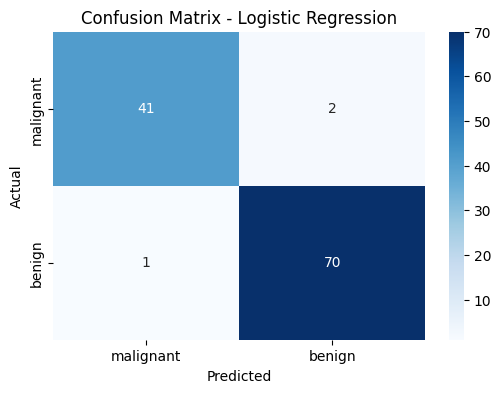

In [ ]:
#11. Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = data.target_names

# Visualize confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


In [ ]:
#12. Write a Python program to train a Logistic Regression model and evaluate its performance using Precision, Recall, and F1-Score.

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate performance
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print scores
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

Precision: 0.9722
Recall:    0.9859
F1 Score:  0.9790


In [1]:
#13. Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance.

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Create an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                           n_redundant=2, n_clusters_per_class=1,
                           weights=[0.9, 0.1], random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression without class_weight
model_no_weight = LogisticRegression(max_iter=1000)
model_no_weight.fit(X_train, y_train)
y_pred_no_weight = model_no_weight.predict(X_test)
f1_no_weight = f1_score(y_test, y_pred_no_weight)

# Logistic Regression with class_weight='balanced'
model_weighted = LogisticRegression(class_weight='balanced', max_iter=1000)
model_weighted.fit(X_train, y_train)
y_pred_weighted = model_weighted.predict(X_test)
f1_weighted = f1_score(y_test, y_pred_weighted)

# Compare F1 scores
print(f"F1 Score without class_weight: {f1_no_weight:.4f}")
print(f"F1 Score with class_weight='balanced': {f1_weighted:.4f}")


F1 Score without class_weight: 0.9167
F1 Score with class_weight='balanced': 0.8679


In [4]:
#14. Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Handle missing values
# Fill missing 'Age' with the median age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing 'Embarked' with the most common port
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column as it has too many missing values
data.drop('Cabin', axis=1, inplace=True)

# Convert categorical variables to numeric
# Convert 'Sex' to numeric
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])

# Convert 'Embarked' to numeric
data['Embarked'] = LabelEncoder().fit_transform(data['Embarked'])

# Select features and target variable
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]  # Features
y = data['Survived']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression(max_iter=200)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

First few rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3734

<ipython-input-4-6991c165cc24>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-4-6991c165cc24>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [6]:
#15. Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model. Evaluate its accuracy and compare results with and without scaling.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)

# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.drop('Cabin', axis=1, inplace=True)

# Convert categorical variables to numeric
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])
data['Embarked'] = LabelEncoder().fit_transform(data['Embarked'])

# Select features and target variable
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]  # Features
y = data['Survived']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression without scaling
model_no_scaling = LogisticRegression(max_iter=200)
model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_no_scaling.predict(X_test)

# Evaluate accuracy without scaling
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
print(f"Accuracy without scaling: {accuracy_no_scaling:.2f}")

# Logistic Regression with scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_with_scaling = LogisticRegression(max_iter=200)
model_with_scaling.fit(X_train_scaled, y_train)
y_pred_with_scaling = model_with_scaling.predict(X_test_scaled)

# Evaluate accuracy with scaling
accuracy_with_scaling = accuracy_score(y_test, y_pred_with_scaling)
print(f"Accuracy with scaling: {accuracy_with_scaling:.2f}")

# Display confusion matrix and classification report for both models
print("\nConfusion Matrix without scaling:")
print(confusion_matrix(y_test, y_pred_no_scaling))
print("\nClassification Report without scaling:")
print(classification_report(y_test, y_pred_no_scaling))

print("\nConfusion Matrix with scaling:")
print(confusion_matrix(y_test, y_pred_with_scaling))
print("\nClassification Report with scaling:")
print(classification_report(y_test, y_pred_with_scaling))

<ipython-input-6-96a0494b8d64>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-6-96a0494b8d64>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

Accuracy without scaling: 0.81
Accuracy with scaling: 0.80

Confusion Matrix without scaling:
[[90 15]
 [19 55]]

Classification Report without scaling:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Confusion Matrix with scaling:
[[90 15]
 [20 54]]

Classification Report with scaling:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [7]:
#16. Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score.

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict probabilities for ROC-AUC (use probability of class 1)
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {roc_auc:.4f}")

ROC-AUC Score: 0.9974


In [8]:
#17. Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create Logistic Regression model with custom learning rate (C=0.5)
model = LogisticRegression(C=0.5, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with C=0.5: {accuracy:.4f}")

Accuracy with C=0.5: 0.9737


In [9]:
#18. Write a Python program to train Logistic Regression and identify important features based on model coefficients.

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Get feature importance (coefficients)
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Coef': np.abs(coefficients)
})

# Sort by absolute value of coefficients
feature_importance = feature_importance.sort_values(by='Absolute Coef', ascending=False)

# Display top important features
print("Top important features based on Logistic Regression coefficients:\n")
print(feature_importance[['Feature', 'Coefficient']].head(10))


Top important features based on Logistic Regression coefficients:

                 Feature  Coefficient
21         worst texture    -1.350606
10          radius error    -1.268178
28        worst symmetry    -1.208200
7    mean concave points    -1.119804
26       worst concavity    -0.943053
13            area error    -0.907186
20          worst radius    -0.879840
23            worst area    -0.841846
6         mean concavity    -0.801458
27  worst concave points    -0.778217


In [10]:
#19. Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa Score.

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import cohen_kappa_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate using Cohen's Kappa Score
kappa_score = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa Score: {kappa_score:.4f}")

Cohen's Kappa Score: 0.9437


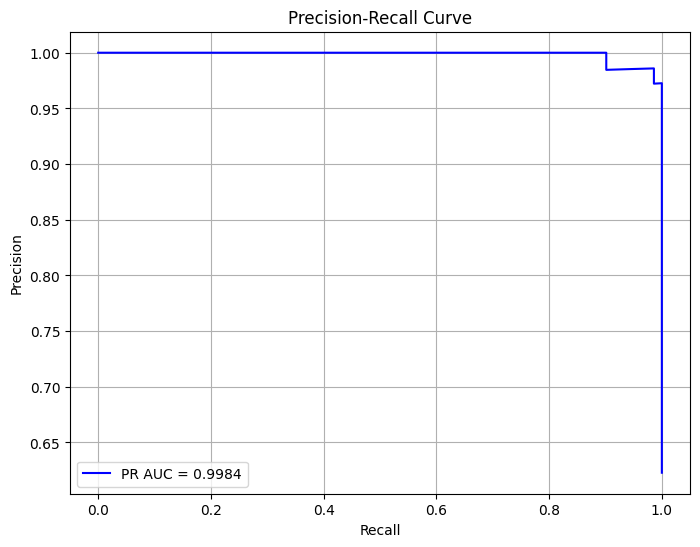

In [11]:
#20. Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classification.

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, auc

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Compute precision-recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
#21. Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Solvers to test
solvers = ['liblinear', 'saga', 'lbfgs']
accuracy_scores = {}

# Train and evaluate models with different solvers
for solver in solvers:
    try:
        model = LogisticRegression(solver=solver, max_iter=1000)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores[solver] = accuracy
    except Exception as e:
        accuracy_scores[solver] = f"Error: {e}"

# Print comparison results
print("Accuracy comparison of Logistic Regression with different solvers:\n")
for solver, acc in accuracy_scores.items():
    print(f"{solver}: {acc}")

Accuracy comparison of Logistic Regression with different solvers:

liblinear: 0.9736842105263158
saga: 0.9736842105263158
lbfgs: 0.9736842105263158


In [13]:
#22. Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation Coefficient (MCC).

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import matthews_corrcoef

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate using Matthews Correlation Coefficient
mcc_score = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc_score:.4f}")

Matthews Correlation Coefficient (MCC): 0.9439


In [15]:
#23. Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scaling.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)

# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.drop('Cabin', axis=1, inplace=True)

# Convert categorical variables to numeric
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])
data['Embarked'] = LabelEncoder().fit_transform(data['Embarked'])

# Select features and target variable
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]  # Features
y = data['Survived']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression on raw data
model_raw = LogisticRegression(max_iter=200)
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)

# Evaluate accuracy on raw data
accuracy_raw = accuracy_score(y_test, y_pred_raw)
print(f"Accuracy on raw data: {accuracy_raw:.2f}")

# Logistic Regression on standardized data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LogisticRegression(max_iter=200)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Evaluate accuracy on standardized data
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy on standardized data: {accuracy_scaled:.2f}")

# Display confusion matrix and classification report for both models
print("\nConfusion Matrix on raw data:")
print(confusion_matrix(y_test, y_pred_raw))
print("\nClassification Report on raw data:")
print(classification_report(y_test, y_pred_raw))

print("\nConfusion Matrix on standardized data:")
print(confusion_matrix(y_test, y_pred_scaled))
print("\nClassification Report on standardized data:")
print(classification_report(y_test, y_pred_scaled))

Accuracy on raw data: 0.81
Accuracy on standardized data: 0.80

Confusion Matrix on raw data:
[[90 15]
 [19 55]]

Classification Report on raw data:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Confusion Matrix on standardized data:
[[90 15]
 [20 54]]

Classification Report on standardized data:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



<ipython-input-15-d868587d0035>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-15-d868587d0035>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [16]:
#24. Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation.

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Grid of C values to try
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Grid search with cross-validation
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

# Best C value
best_C = grid.best_params_['C']
best_score = grid.best_score_

# Evaluate on test set with best C
final_model = LogisticRegression(C=best_C, max_iter=1000)
final_model.fit(X_train_scaled, y_train)
y_pred = final_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)

# Results
print(f"Best C from cross-validation: {best_C}")
print(f"Cross-validation accuracy:    {best_score:.4f}")
print(f"Test set accuracy:            {test_accuracy:.4f}")


Best C from cross-validation: 10
Cross-validation accuracy:    0.9758
Test set accuracy:            0.9737


In [17]:
#25. Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions.

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import joblib

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Save the model and scaler using joblib
joblib.dump(model, "logistic_model.pkl")
joblib.dump(scaler, "scaler.pkl")

# Load the model and scaler
loaded_model = joblib.load("logistic_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")

# Transform test data using the loaded scaler
X_test_scaled_loaded = loaded_scaler.transform(X_test)

# Make predictions using the loaded model
y_pred = loaded_model.predict(X_test_scaled_loaded)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy using loaded model: {accuracy:.4f}")


Accuracy using loaded model: 0.9737
